In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import platform
import matplotlib.patches as patches

car = pd.read_csv('21_06전기_자동차현황(그래프용).csv')
car_3 = pd.read_csv('전기승용차_최종_2.csv')
hm_21 = pd.read_csv('21화물차지원금.csv')
sy_21 = pd.read_csv('21승용차지원금.csv')

In [2]:
car

,지역,승용차,승합차,화물차
0,서울,2700839,103178,327888
1,경기,5041944,200347,818406
2,인천,1421284,47291,194101
3,대구,1017764,29532,156555
4,제주,523916,18406,81393


In [3]:
car_3

,지역,승용차,승합차,화물차
0,서울,21623,0,0
1,경기,23479,0,0
2,인천,6472,0,0
3,대구,9919,0,0
4,제주,12871,0,0


In [4]:
car_2 = car.transpose()
car_2

,0,1,2,3,4
지역,서울,경기,인천,대구,제주
승용차,2700839,5041944,1421284,1017764,523916
승합차,103178,200347,47291,29532,18406
화물차,327888,818406,194101,156555,81393


In [5]:
car_2 = car.transpose()
car_2.rename(columns=car_2.iloc[0], inplace=True) # 행열이 전환된 데이터프레임의 열 이름 제대로 수정
car_2 = car_2.drop(car_2.index[0]) #지역 열 삭제
car_2.insert(0, '차종류' , ['승용차', '승합차' , '화물차']) #열추가
car_2 = car_2.reset_index(drop = True) #index 재설정
car_2

,차종류,서울,경기,인천,대구,제주
0,승용차,2700839,5041944,1421284,1017764,523916
1,승합차,103178,200347,47291,29532,18406
2,화물차,327888,818406,194101,156555,81393


In [6]:
car_4 = car_3.transpose()
car_4

,0,1,2,3,4
지역,서울,경기,인천,대구,제주
승용차,21623,23479,6472,9919,12871
승합차,0,0,0,0,0
화물차,0,0,0,0,0


In [7]:
car_4 = car_3.transpose()
car_4.rename(columns=car_4.iloc[0], inplace=True) # 행열이 전환된 데이터프레임의 열 이름 제대로 수정
car_4 = car_4.drop(car_4.index[0]) #지역 행 삭제
car_4.insert(0, '차종류' , ['승용차', '승합차' , '화물차']) #열추가
car_4 = car_4.reset_index(drop = True) #index 재설정
car_4

,차종류,서울,경기,인천,대구,제주
0,승용차,21623,23479,6472,9919,12871
1,승합차,0,0,0,0,0
2,화물차,0,0,0,0,0


In [8]:
sy_21

,지역,지원금
0,서울,391.7736
1,경기,407.4866
2,인천,419.2727
3,대구,508.3333
4,제주,401.3902


In [9]:
sy_21_2 = sy_21.transpose()
sy_21_2.rename(columns=sy_21_2.iloc[0], inplace=True) # 행열이 전환된 데이터프레임의 열 이름 제대로 수정
sy_21_2 = sy_21_2.drop(sy_21_2.index[0])
sy_21_2

,서울,경기,인천,대구,제주
지원금,391.7736,407.4866,419.2727,508.3333,401.3902


In [11]:
car_2_sy = car_2.iloc[:1 , :]
car_2_sy

,차종류,서울,경기,인천,대구,제주
0,승용차,2700839,5041944,1421284,1017764,523916


In [12]:
car_4_sy = car_4.iloc[:1, :]
car_4_sy

,차종류,서울,경기,인천,대구,제주
0,승용차,21623,23479,6472,9919,12871


In [13]:
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')
    
pd.options.display.float_format = '{:.3f}'.format #소수점 3자리의 실수로 표현해라
    
car1_total = car_2_sy['서울'].sum() #서울 있는 열 다 더하기
car2_total = car_2_sy['경기'].sum() #경기 있는 열 다 더하기
car3_total = car_2_sy['인천'].sum() #인천 있는 열 다 더하기
car4_total = car_2_sy['대구'].sum() #대구 있는 열 다 더하기
car5_total = car_2_sy['제주'].sum() #제주 있는 열 다 더하기

#car_s_total = car.iloc[2]
#print(car_s_total)

car1_a = (car_4_sy['서울']/car1_total) #승용차 있는 열 다 더한값에 승용차 열의 각행 값을 나눈 값을 car1_a 시리즈에 저장해라 
car2_a = (car_4_sy['경기']/car2_total) #승용차 있는 열 다 더한값에 승용차 열의 각행 값을 나눈 값을 car2_a 시리즈에 저장해라
car3_a = (car_4_sy['인천']/car3_total) #승용차 있는 열 다 더한값에 승용차 열의 각행 값을 나눈 값을 car3_a 시리즈에 저장해라
car4_a = (car_4_sy['대구']/car4_total) #승용차 있는 열 다 더한값에 승용차 열의 각행 값을 나눈 값을 car4_a 시리즈에 저장해라
car5_a = (car_4_sy['제주']/car5_total) #승용차 있는 열 다 더한값에 승용차 열의 각행 값을 나눈 값을 car5_a 시리즈에 저장해라
#print(type(car1_a))
car_final = pd.concat([car1_a,car2_a,car3_a,car4_a,car5_a], axis=1) #car1_a~3_a 의 시리즈를 car_final의 데이터프레임에 합쳐라.

#print(type(car_final))
do = pd.DataFrame({
    '차종류' : ['승용차'] 
}) #DataFrame을 생성 지역 열에 승용~화물 행 생성

car_final = pd.concat([do, car_final], axis=1) #do 변수에 저장되어있는 데이터프레임에, car_final 변수에 저장되어 있는 열 합치기
#car1_a, car2_a, car3_a 3개 합치기
car_final

,차종류,서울,경기,인천,대구,제주
0,승용차,0.008,0.005,0.005,0.010,0.025


In [14]:
car_5 = car_final.transpose()
car_5.rename(columns=car_5.iloc[0], inplace=True) # 행열이 전환된 데이터프레임의 열 이름 제대로 수정
car_5 = car_5.drop(car_5.index[0]) #지역 열 삭제
car_5.insert(0, '지역' , ['서울', '경기' , '인천' , '대구' , '제주']) #열추가
car_5 = car_5.reset_index(drop = True) #index 재설정
car_5

,지역,승용차
0,서울,0.008
1,경기,0.005
2,인천,0.005
3,대구,0.010
4,제주,0.025


In [15]:
sy_per = car_5.iloc[: , :2]
sy_per

,지역,승용차
0,서울,0.008
1,경기,0.005
2,인천,0.005
3,대구,0.010
4,제주,0.025


<IPython.core.display.Javascript object>


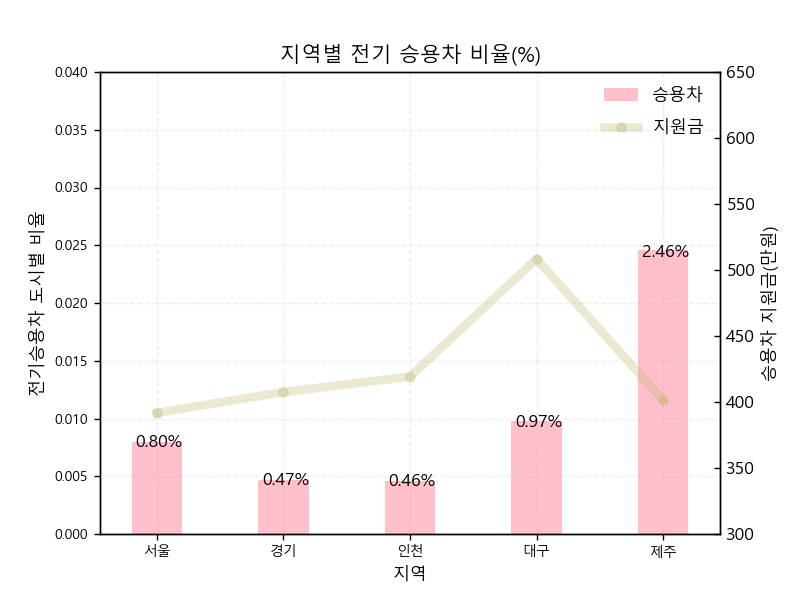

In [21]:
import pandas as pd
import numpy as np


ax = sy_per.plot(x='지역', kind='bar',  title='지역별 전기 승용차 비율(%)', width=0.4 ,fontsize = 8, color = 'pink')
#car_final의 그래프의 xlabel ='지역' bar그래프 형태 
car_sy = car_5.iloc[:,[0,1]] #모든 행 // 0열~3열
xlabel = ['서울', '경기', '인천', '대구', '제주']
ylabel1 = sy_21['지원금']
ylabel2 = car_sy['승용차']
ax.set_ylim(0, 0.04)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.2f"%(height*100) + '%', xy=(left+width/1.85, bottom+height/1.008), ha='center', va='center' , fontsize = 10)
    #비율 위치
ax.set_ylabel('전기승용차 도시별 비율')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.2, linestyle='--')
ax2 = ax.twinx() #오른쪽 y축 겹쳐놓기
ax2.plot(xlabel, ylabel1, color='darkkhaki', marker = 'o',markersize=5, linewidth=5, alpha = 0.3) #꺽은선 그래프
ax2.set_ylim(300, 650) #오른 쪽 y축 값
ax2.set_ylabel('승용차 지원금(만원)')
ax2.tick_params(axis='y', direction='in')
ax.legend(labels = ['승용차'] , frameon = False)
ax2.legend(bbox_to_anchor = (1,0.93),labels = ['지원금'], frameon=False)
#plt.legend(labels = ['승용차'])
#ax2.legend(labels = ['지원금'])
